# Εκπαίδευση προσαρμοσμένου ανιχνευτή ανικειμένων με χρήση του αλγορίθομου YOLOv3 και χρήση σε εικόνες και βίντεο.

### Λήψη κώδικα

In [ ]:
!rm -rf thesis
!git clone https://github.com/mpvasilis/thesis.git

Cloning into 'thesis'...
remote: Enumerating objects: 1000, done.
remote: Total 1000 (delta 0), reused 0 (delta 0), pack-reused 1000
Receiving objects: 100% (1000/1000), 180.71 MiB | 36.41 MiB/s, done.
Resolving deltas: 100% (311/311), done.
Checking out files: 100% (1254/1254), done.


###Λήψη προ-εκπαιδευμένου μοντέλο YOLOv3

In [ ]:
!wget http://vasilis.pw/thesis/data/yolov3.weights

--2020-11-20 22:07:52--  http://vasilis.pw/thesis/data/yolov3.weights
Resolving vasilis.pw (vasilis.pw)... 104.24.110.241, 172.67.160.163, 104.24.111.241, ...
Connecting to vasilis.pw (vasilis.pw)|104.24.110.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M)
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  23.6MB/s    in 10s     

2020-11-20 22:08:03 (22.8 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



###Εγκατάσταση απαιτήσεων

In [ ]:
!pip install -r thesis/requirements.txt
!pip install Keras==2.2.4

     |████████████████████████████████| 411.5MB 40kB/s 
     |████████████████████████████████| 3.5MB 13.7MB/s 
     |████████████████████████████████| 3.8MB 48.0MB/s 
     |████████████████████████████████| 512kB 53.4MB/s 
     |████████████████████████████████| 51kB 8.3MB/s 
     |████████████████████████████████| 6.9MB 42.6MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 552kB 52.5MB/s 
     |████████████████████████████████| 204kB 59.8MB/s 
     |████████████████████████████████| 163kB 61.0MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=0b7f977bf196715473b1e7b7156f542e6775e12383a6f7b465bb1bea9d04efaf
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, 

### Δημιουργία Dataset για εκπαίδευση

In [ ]:
%cd /content/thesis/OID
!python main.py downloader --classes 'Handgun' --type_csv train --limit 1000 -y
!python main.py downloader --classes 'Handgun' --type_csv test --limit 100 -y
!python main.py downloader --classes 'Handgun' --type_csv validation --limit 100 -y

/content/thesis/OID

		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading Handgun.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Automatic download.
...145%, 0 MB, 58916 KB/s, 0 seconds passed
[DOWNLOAD] | File class-desc

### Μετροπή των labels σε XML (συμβατό με Pascal VOC)

In [ ]:
%cd /content/thesis/OID
import os
from tqdm import tqdm
from sys import exit
import argparse
import cv2
from textwrap import dedent
from lxml import etree

XML_DIR = ''

#os.chdir('Dataset')
os.chdir(os.path.join("OID", "Dataset"))
DIRS = os.listdir(os.getcwd())

for DIR in DIRS:
    if os.path.isdir(DIR):
        os.chdir(DIR)

        print("Currently in Subdirectory:", DIR)
        CLASS_DIRS = os.listdir(os.getcwd()) 
        for CLASS_DIR in CLASS_DIRS:
            if " " in CLASS_DIR:
                os.rename(CLASS_DIR, CLASS_DIR.replace(" ", "_"))
        
        CLASS_DIRS = os.listdir(os.getcwd())
        for CLASS_DIR in CLASS_DIRS:
            #if " " in CLASS_DIR:
            #    os.rename(CLASS_DIR, CLASS_DIR.replace(" ", "_"))
            if os.path.isdir(CLASS_DIR):
                os.chdir(CLASS_DIR)

                print("\n" + "Creating PASCAL VOC XML Files for Class:", CLASS_DIR)
                # Create Directory for annotations if it does not exist yet
                #if not os.path.exists(XML_DIR):
                #    os.makedirs(XML_DIR)

                #Read Labels from OIDv4 ToolKit
                os.chdir("Label")

                #Create PASCAL XML
                for filename in tqdm(os.listdir(os.getcwd())):
                    if filename.endswith(".txt"):
                        filename_str = str.split(filename, ".")[0]


                        annotation = etree.Element("annotation")
                        
                        os.chdir("..")
                        folder = etree.Element("folder")
                        folder.text = os.path.basename(os.getcwd())
                        annotation.append(folder)

                        filename_xml = etree.Element("filename")
                        filename_xml.text = filename_str + ".jpg"
                        annotation.append(filename_xml)

                        path = etree.Element("path")
                        path.text = os.path.join(os.path.dirname(os.path.abspath(filename)), filename_str + ".jpg")
                        annotation.append(path)

                        source = etree.Element("source")
                        annotation.append(source)

                        database = etree.Element("database")
                        database.text = "Unknown"
                        source.append(database)

                        size = etree.Element("size")
                        annotation.append(size)

                        width = etree.Element("width")
                        height = etree.Element("height")
                        depth = etree.Element("depth")

                        img = cv2.imread(filename_xml.text)

                        try:
                            width.text = str(img.shape[1])
                        except AttributeError:
                            #os.chdir("..")
                            os.chdir("Label")
                            continue
                        height.text = str(img.shape[0])
                        depth.text = str(img.shape[2])

                        size.append(width)
                        size.append(height)
                        size.append(depth)

                        segmented = etree.Element("segmented")
                        segmented.text = "0"
                        annotation.append(segmented)

                        os.chdir("Label")
                        label_original = open(filename, 'r')

                        # Labels from OIDv4 Toolkit: name_of_class X_min Y_min X_max Y_max
                        for line in label_original:
                            line = line.strip()
                            l = line.split(' ')
                            class_name = l[0]
                            try:
                                xmin_l = str(int(float(l[1])))
                                add1 = 0
                            except ValueError:
                                class_name = l[0]+"_"+l[1]
                                add1 = 1

                            xmin_l = str(int(float(l[1+add1])))
                            ymin_l = str(int(float(l[2+add1])))
                            xmax_l = str(int(float(l[3+add1])))
                            ymax_l = str(int(float(l[4+add1])))
                            
                            obj = etree.Element("object")
                            annotation.append(obj)

                            name = etree.Element("name")
                            name.text = class_name
                            obj.append(name)

                            pose = etree.Element("pose")
                            pose.text = "Unspecified"
                            obj.append(pose)

                            truncated = etree.Element("truncated")
                            truncated.text = "0"
                            obj.append(truncated)

                            difficult = etree.Element("difficult")
                            difficult.text = "0"
                            obj.append(difficult)

                            bndbox = etree.Element("bndbox")
                            obj.append(bndbox)

                            xmin = etree.Element("xmin")
                            xmin.text = xmin_l
                            bndbox.append(xmin)

                            ymin = etree.Element("ymin")
                            ymin.text = ymin_l
                            bndbox.append(ymin)

                            xmax = etree.Element("xmax")
                            xmax.text = xmax_l
                            bndbox.append(xmax)

                            ymax = etree.Element("ymax")
                            ymax.text = ymax_l
                            bndbox.append(ymax)

                        os.chdir("..")

                        #os.chdir(XML_DIR)

                        # write xml to file
                        s = etree.tostring(annotation, pretty_print=True)
                        with open(filename_str + ".xml", 'wb') as f:
                            f.write(s)
                            f.close()

                        #os.chdir("..")
                        os.chdir("Label")

                os.chdir("..")
                os.chdir("..")   
                   
        os.chdir("..")

  0%|          | 0/561 [00:00<?, ?it/s]

/content/thesis/OID
Currently in Subdirectory: train

Creating PASCAL VOC XML Files for Class: Handgun


 12%|█▎        | 9/72 [00:00<00:00, 81.15it/s]

Currently in Subdirectory: test

Creating PASCAL VOC XML Files for Class: Handgun


 45%|████▌     | 9/20 [00:00<00:00, 80.90it/s]

Currently in Subdirectory: validation

Creating PASCAL VOC XML Files for Class: Handgun


100%|██████████| 20/20 [00:00<00:00, 75.01it/s]


### Μετατροπή XML σε μορφή για YOLOv3 

In [ ]:
%cd /content/thesis
import xml.etree.ElementTree as ET
from os import getcwd
import os


dataset_train = 'OID/OID/Dataset/train/'
dataset_file = 'YOLOv3/CLASS_test.txt'
classes_file = dataset_file[:-4]+'_classes.txt'


CLS = os.listdir(dataset_train)
classes =[dataset_train+CLASS for CLASS in CLS]
wd = getcwd()


def test(fullname):
    bb = ""
    in_file = open(fullname)
    tree=ET.parse(in_file)
    root = tree.getroot()
    for i, obj in enumerate(root.iter('object')):
        difficult = obj.find('difficult').text
        cls = obj.find('name').text
        if cls not in CLS or int(difficult)==1:
            continue
        cls_id = CLS.index(cls)
        xmlbox = obj.find('bndbox')
        b = (int(xmlbox.find('xmin').text), int(xmlbox.find('ymin').text), int(xmlbox.find('xmax').text), int(xmlbox.find('ymax').text))
        bb += (" " + ",".join([str(a) for a in b]) + ',' + str(cls_id))

        # we need this because I don't know overlapping or something like that
        if cls == 'Traffic_light':
            list_file = open(dataset_file, 'a')
            file_string = str(fullname)[:-4]+'.jpg'+bb+'\n'
            list_file.write(file_string)
            list_file.close()
            bb = ""

    if bb != "":
        list_file = open(dataset_file, 'a')
        file_string = str(fullname)[:-4]+'.jpg'+bb+'\n'
        list_file.write(file_string)
        list_file.close()



for CLASS in classes:
    for filename in os.listdir(CLASS):
        if not filename.endswith('.xml'):
            continue
        fullname = os.getcwd()+'/'+CLASS+'/'+filename
        test(fullname)

for CLASS in CLS:
    list_file = open(classes_file, 'a')
    file_string = str(CLASS)+"\n"
    list_file.write(file_string)
    list_file.close()

/content/thesis


In [ ]:
%cd /content/thesis/YOLOv3/model_data
!wget http://vasilis.pw/thesis/data/yolov3.cfg
%cd /content/thesis/YOLOv3/

/content/thesis/YOLOv3/model_data
--2020-11-20 22:16:26--  http://vasilis.pw/thesis/data/yolov3.cfg
Resolving vasilis.pw (vasilis.pw)... 172.67.160.163, 104.24.111.241, 104.24.110.241, ...
Connecting to vasilis.pw (vasilis.pw)|172.67.160.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K)
Saving to: ‘yolov3.cfg.1’

yolov3.cfg.1        100%[===================>]   8.15K  --.-KB/s    in 0s      

2020-11-20 22:16:27 (211 MB/s) - ‘yolov3.cfg.1’ saved [8342/8342]

/content/thesis/YOLOv3


### Μετατροπή του προεκπαιδευμένου μοντέλου YOLOv3 (Darknet) σε Keras

In [ ]:
import argparse
import configparser
import io
import os
from collections import defaultdict

import numpy as np
from keras import backend as K
from keras.layers import (Conv2D, Input, ZeroPadding2D, Add,
                          UpSampling2D, MaxPooling2D, Concatenate)
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras.regularizers import l2
from keras.utils.vis_utils import plot_model as plot


def unique_config_sections(config_file):
    """Convert all config sections to have unique names.

    Adds unique suffixes to config sections for compability with configparser.
    """
    section_counters = defaultdict(int)
    output_stream = io.StringIO()
    with open(config_file) as fin:
        for line in fin:
            if line.startswith('['):
                section = line.strip().strip('[]')
                _section = section + '_' + str(section_counters[section])
                section_counters[section] += 1
                line = line.replace(section, _section)
            output_stream.write(line)
    output_stream.seek(0)
    return output_stream

# %%
config_path = os.path.expanduser('model_data/yolov3.cfg')
weights_path = os.path.expanduser('/content/yolov3.weights')
assert config_path.endswith('.cfg'), '{} is not a .cfg file'.format(
    config_path)
assert weights_path.endswith(
    '.weights'), '{} is not a .weights file'.format(weights_path)

output_path = os.path.expanduser('model_data/yolo_weights.h5')
assert output_path.endswith(
    '.h5'), 'output path {} is not a .h5 file'.format(output_path)
output_root = os.path.splitext(output_path)[0]

# Load weights and config.
print('Loading weights.')
weights_file = open(weights_path, 'rb')
major, minor, revision = np.ndarray(
    shape=(3, ), dtype='int32', buffer=weights_file.read(12))
if (major*10+minor)>=2 and major<1000 and minor<1000:
    seen = np.ndarray(shape=(1,), dtype='int64', buffer=weights_file.read(8))
else:
    seen = np.ndarray(shape=(1,), dtype='int32', buffer=weights_file.read(4))
print('Weights Header: ', major, minor, revision, seen)

print('Parsing Darknet config.')
unique_config_file = unique_config_sections(config_path)
cfg_parser = configparser.ConfigParser()
cfg_parser.read_file(unique_config_file)

print('Creating Keras model.')
input_layer = Input(shape=(None, None, 3))
prev_layer = input_layer
all_layers = []

weight_decay = float(cfg_parser['net_0']['decay']
                      ) if 'net_0' in cfg_parser.sections() else 5e-4
count = 0
out_index = []
for section in cfg_parser.sections():
    print('Parsing section {}'.format(section))
    if section.startswith('convolutional'):
        filters = int(cfg_parser[section]['filters'])
        size = int(cfg_parser[section]['size'])
        stride = int(cfg_parser[section]['stride'])
        pad = int(cfg_parser[section]['pad'])
        activation = cfg_parser[section]['activation']
        batch_normalize = 'batch_normalize' in cfg_parser[section]

        padding = 'same' if pad == 1 and stride == 1 else 'valid'

        # Setting weights.
        # Darknet serializes convolutional weights as:
        # [bias/beta, [gamma, mean, variance], conv_weights]
        prev_layer_shape = K.int_shape(prev_layer)

        weights_shape = (size, size, prev_layer_shape[-1], filters)
        darknet_w_shape = (filters, weights_shape[2], size, size)
        weights_size = np.product(weights_shape)

        print('conv2d', 'bn'
              if batch_normalize else '  ', activation, weights_shape)

        conv_bias = np.ndarray(
            shape=(filters, ),
            dtype='float32',
            buffer=weights_file.read(filters * 4))
        count += filters

        if batch_normalize:
            bn_weights = np.ndarray(
                shape=(3, filters),
                dtype='float32',
                buffer=weights_file.read(filters * 12))
            count += 3 * filters

            bn_weight_list = [
                bn_weights[0],  # scale gamma
                conv_bias,  # shift beta
                bn_weights[1],  # running mean
                bn_weights[2]  # running var
            ]

        conv_weights = np.ndarray(
            shape=darknet_w_shape,
            dtype='float32',
            buffer=weights_file.read(weights_size * 4))
        count += weights_size

        # DarkNet conv_weights are serialized Caffe-style:
        # (out_dim, in_dim, height, width)
        # We would like to set these to Tensorflow order:
        # (height, width, in_dim, out_dim)
        conv_weights = np.transpose(conv_weights, [2, 3, 1, 0])
        conv_weights = [conv_weights] if batch_normalize else [
            conv_weights, conv_bias
        ]

        # Handle activation.
        act_fn = None
        if activation == 'leaky':
            pass  # Add advanced activation later.
        elif activation != 'linear':
            raise ValueError(
                'Unknown activation function `{}` in section {}'.format(
                    activation, section))

        # Create Conv2D layer
        if stride>1:
            # Darknet uses left and top padding instead of 'same' mode
            prev_layer = ZeroPadding2D(((1,0),(1,0)))(prev_layer)
        conv_layer = (Conv2D(
            filters, (size, size),
            strides=(stride, stride),
            kernel_regularizer=l2(weight_decay),
            use_bias=not batch_normalize,
            weights=conv_weights,
            activation=act_fn,
            padding=padding))(prev_layer)

        if batch_normalize:
            conv_layer = (BatchNormalization(
                weights=bn_weight_list))(conv_layer)
        prev_layer = conv_layer

        if activation == 'linear':
            all_layers.append(prev_layer)
        elif activation == 'leaky':
            act_layer = LeakyReLU(alpha=0.1)(prev_layer)
            prev_layer = act_layer
            all_layers.append(act_layer)

    elif section.startswith('route'):
        ids = [int(i) for i in cfg_parser[section]['layers'].split(',')]
        layers = [all_layers[i] for i in ids]
        if len(layers) > 1:
            print('Concatenating route layers:', layers)
            concatenate_layer = Concatenate()(layers)
            all_layers.append(concatenate_layer)
            prev_layer = concatenate_layer
        else:
            skip_layer = layers[0]  # only one layer to route
            all_layers.append(skip_layer)
            prev_layer = skip_layer

    elif section.startswith('maxpool'):
        size = int(cfg_parser[section]['size'])
        stride = int(cfg_parser[section]['stride'])
        all_layers.append(
            MaxPooling2D(
                pool_size=(size, size),
                strides=(stride, stride),
                padding='same')(prev_layer))
        prev_layer = all_layers[-1]

    elif section.startswith('shortcut'):
        index = int(cfg_parser[section]['from'])
        activation = cfg_parser[section]['activation']
        assert activation == 'linear', 'Only linear activation supported.'
        all_layers.append(Add()([all_layers[index], prev_layer]))
        prev_layer = all_layers[-1]

    elif section.startswith('upsample'):
        stride = int(cfg_parser[section]['stride'])
        assert stride == 2, 'Only stride=2 supported.'
        all_layers.append(UpSampling2D(stride)(prev_layer))
        prev_layer = all_layers[-1]

    elif section.startswith('yolo'):
        out_index.append(len(all_layers)-1)
        all_layers.append(None)
        prev_layer = all_layers[-1]

    elif section.startswith('net'):
        pass

    else:
        raise ValueError(
            'Unsupported section header type: {}'.format(section))

# Create and save model.
if len(out_index)==0: out_index.append(len(all_layers)-1)
model = Model(inputs=input_layer, outputs=[all_layers[i] for i in out_index])
print(model.summary())

model.save('{}'.format(output_path))
print('Saved Keras model to {}'.format(output_path))

# Check to see if all weights have been read.
remaining_weights = len(weights_file.read()) / 4
weights_file.close()
print('Read {} of {} from Darknet weights.'.format(count, count +
                                                    remaining_weights))
if remaining_weights > 0:
    print('Warning: {} unused weights'.format(remaining_weights))


plot(model, to_file='{}.png'.format(output_root), show_shapes=True)
print('Saved model plot to {}.png'.format(output_root))


Using TensorFlow backend.


Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.


Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)









Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Parsing section convolutional_10
conv2d bn leaky (1, 1, 256, 128)
Parsing section convolutional_11
conv2d bn leaky (3, 3, 128, 256)
Parsing section short

### Εκπαίδευση μοντέλου

In [ ]:
%cd /content/thesis/YOLOv3/
import tensorflow as tf
tf.python.control_flow_ops = tf
import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo_weights.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes)
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)


annotation_path = 'CLASS_test.txt'
log_dir = 'logs/000/'
classes_path = 'CLASS_test_classes.txt'#'model_data/voc_classes.txt'
anchors_path = 'model_data/yolo_anchors.txt'
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors = get_anchors(anchors_path)

input_shape = (416,416) # multiple of 32, hw

is_tiny_version = len(anchors)==6 # default setting
if is_tiny_version:
    model = create_tiny_model(input_shape, anchors, num_classes,
        freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
else:
    model = create_model(input_shape, anchors, num_classes,
        freeze_body=2, weights_path='model_data/yolo_weights.h5') # make sure you know what you freeze

logging = TensorBoard(log_dir=log_dir)
checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
    monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

val_split = 0.1
with open(annotation_path) as f:
    lines = f.readlines()
np.random.seed(10101)
np.random.shuffle(lines)
np.random.seed(None)
num_val = int(len(lines)*val_split)
num_train = len(lines) - num_val

# Train with frozen layers first, to get a stable loss.
# Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
if True:
    model.compile(optimizer=Adam(lr=1e-3), loss={
        # use custom yolo_loss Lambda layer.
        'yolo_loss': lambda y_true, y_pred: y_pred})

    batch_size = 16
    print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
    model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=10,
            initial_epoch=0,
            callbacks=[logging, checkpoint])
    model.save_weights(log_dir + 'trained_weights_stage_1.h5')

# Unfreeze and continue training, to fine-tune.
# Train longer if the result is not good.
if True:
    for i in range(len(model.layers)):
        model.layers[i].trainable = True
    model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
    print('Unfreeze all of the layers.')

    batch_size = 16 # note that more GPU memory is required after unfreezing the body
    print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
    model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
        steps_per_epoch=max(1, num_train//batch_size),
        validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
        validation_steps=max(1, num_val//batch_size),
        epochs=50,
        initial_epoch=20,
        callbacks=[logging, checkpoint, reduce_lr, early_stopping])
    model.save_weights(log_dir + 'trained_weights_final.h5')

# Further training if needed.

/content/thesis/YOLOv3

Create YOLOv3 model with 9 anchors and 1 classes.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((1, 1, 1024, 18) vs (255, 1024, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_59 due to mismatch in shape ((18,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((1, 1, 512, 18) vs (255, 512, 1, 1)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_67 due to mismatch in shape ((18,) vs (255,)).
  weight_values[i].shape))
/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:1140: UserWarning: Skipping loading of weights for layer conv2d_75 due to mismatch in shape ((1,

Load weights model_data/yolo_weights.h5.
Freeze the first 249 layers of total 252 layers.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 505 samples, val on 56 samples, with batch size 16.




Epoch 1/10
31/31 [==============================] - 59s 2s/step - loss: 3818.7012 - val_loss: 599.9496

Epoch 2/10
31/31 [==============================] - 44s 1s/step - loss: 368.9662 - val_loss: 175.4818
Epoch 3/10
31/31 [==============================] - 46s 1s/step - loss: 173.6252 - val_loss: 118.1058
Epoch 4/10
31/31 [==============================] - 31s 988ms/step - loss: 123.9989 - val_loss: 89.4411
Epoch 5/10
31/31 [==============================] - 45s 1s/step - loss: 96.9398 - val_loss: 70.7892
Epoch 6/10
31/31 [==============================] - 45s 1s/step - loss: 80.0934 - val_loss: 64.6302
Epoch 7/10
31/31 [==============================] - 44s 1s/step - loss: 68.4439 - val_loss: 53.5921
Epoch 8/10
31/31 [===================

###Επαλήθευση μοντέλου με ανίχνευση αντικειμένου σε εικόνα

/content/thesis/YOLOv3
--2020-11-20 23:27:15--  http://thesis.vasilis.pw/images/guns/gun_4.jpg
Resolving thesis.vasilis.pw (thesis.vasilis.pw)... 5.39.70.116
Connecting to thesis.vasilis.pw (thesis.vasilis.pw)|5.39.70.116|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30179 (29K) [image/jpeg]
Saving to: ‘gun_4.jpg’

gun_4.jpg           100%[===================>]  29.47K  --.-KB/s    in 0.08s   

2020-11-20 23:27:15 (356 KB/s) - ‘gun_4.jpg’ saved [30179/30179]

/content/thesis/YOLOv3/logs/000/trained_weights_final.h5 model, anchors, and classes loaded.
(416, 416, 3)
Found 1 boxes for img
Handgun 0.93 (121, 6) (541, 280)
4.233992593000039


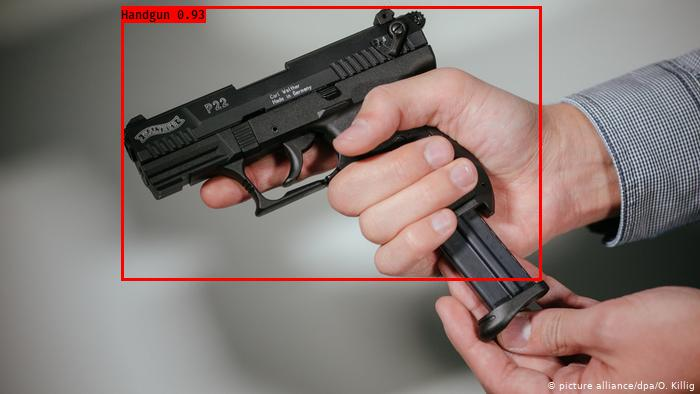

In [ ]:
%cd /content/thesis/YOLOv3
import colorsys
import os
from timeit import default_timer as timer

import numpy as np
from keras import backend as K
from keras.models import load_model
from keras.layers import Input
from PIL import Image, ImageFont, ImageDraw

from yolo3.model import yolo_eval, yolo_body, tiny_yolo_body
from yolo3.utils import letterbox_image
import os
from keras.utils import multi_gpu_model

class YOLO(object):
    _defaults = {
        "model_path": '/content/thesis/YOLOv3/logs/000/trained_weights_final.h5', #'/content/thesis/YOLOv3/logs/000/trained_weights_final.h5',
        "anchors_path": 'model_data/yolo_anchors.txt',
        "classes_path": '/content/thesis/YOLOv3/CLASS_test_classes.txt',
        "score" : 0.3,
        "iou" : 0.45,
        "model_image_size" : (416, 416),
        "gpu_num" : 1,
    }

    @classmethod
    def get_defaults(cls, n):
        if n in cls._defaults:
            return cls._defaults[n]
        else:
            return "Unrecognized attribute name '" + n + "'"

    def __init__(self, **kwargs):
        self.__dict__.update(self._defaults) # set up default values
        self.__dict__.update(kwargs) # and update with user overrides
        self.class_names = self._get_class()
        self.anchors = self._get_anchors()
        self.sess = K.get_session()
        self.boxes, self.scores, self.classes = self.generate()

    def _get_class(self):
        classes_path = os.path.expanduser(self.classes_path)
        with open(classes_path) as f:
            class_names = f.readlines()
        class_names = [c.strip() for c in class_names]
        return class_names

    def _get_anchors(self):
        anchors_path = os.path.expanduser(self.anchors_path)
        with open(anchors_path) as f:
            anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        return np.array(anchors).reshape(-1, 2)

    def generate(self):
        model_path = os.path.expanduser(self.model_path)
        assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

        # Load model, or construct model and load weights.
        num_anchors = len(self.anchors)
        num_classes = len(self.class_names)
        is_tiny_version = num_anchors==6 # default setting
        try:
            self.yolo_model = load_model(model_path, compile=False)
        except:
            self.yolo_model = tiny_yolo_body(Input(shape=(None,None,3)), num_anchors//2, num_classes) \
                if is_tiny_version else yolo_body(Input(shape=(None,None,3)), num_anchors//3, num_classes)
            self.yolo_model.load_weights(self.model_path) # make sure model, anchors and classes match
        else:
            assert self.yolo_model.layers[-1].output_shape[-1] == \
                num_anchors/len(self.yolo_model.output) * (num_classes + 5), \
                'Mismatch between model and given anchor and class sizes'

        print('{} model, anchors, and classes loaded.'.format(model_path))

        # Generate colors for drawing bounding boxes.
        hsv_tuples = [(x / len(self.class_names), 1., 1.)
                      for x in range(len(self.class_names))]
        self.colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
        self.colors = list(
            map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)),
                self.colors))
        np.random.seed(10101)  # Fixed seed for consistent colors across runs.
        np.random.shuffle(self.colors)  # Shuffle colors to decorrelate adjacent classes.
        np.random.seed(None)  # Reset seed to default.

        # Generate output tensor targets for filtered bounding boxes.
        self.input_image_shape = K.placeholder(shape=(2, ))
        if self.gpu_num>=2:
            self.yolo_model = multi_gpu_model(self.yolo_model, gpus=self.gpu_num)
        boxes, scores, classes = yolo_eval(self.yolo_model.output, self.anchors,
                len(self.class_names), self.input_image_shape,
                score_threshold=self.score, iou_threshold=self.iou)
        return boxes, scores, classes

    def detect_image(self, image):
        start = timer()

        if self.model_image_size != (None, None):
            assert self.model_image_size[0]%32 == 0, 'Multiples of 32 required'
            assert self.model_image_size[1]%32 == 0, 'Multiples of 32 required'
            boxed_image = letterbox_image(image, tuple(reversed(self.model_image_size)))
        else:
            new_image_size = (image.width - (image.width % 32),
                              image.height - (image.height % 32))
            boxed_image = letterbox_image(image, new_image_size)
        image_data = np.array(boxed_image, dtype='float32')

        print(image_data.shape)
        image_data /= 255.
        image_data = np.expand_dims(image_data, 0)  # Add batch dimension.

        out_boxes, out_scores, out_classes = self.sess.run(
            [self.boxes, self.scores, self.classes],
            feed_dict={
                self.yolo_model.input: image_data,
                self.input_image_shape: [image.size[1], image.size[0]],
                K.learning_phase(): 0
            })

        print('Found {} boxes for {}'.format(len(out_boxes), 'img'))

        font = ImageFont.truetype(font='font/FiraMono-Medium.otf',
                    size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
        thickness = (image.size[0] + image.size[1]) // 300

        for i, c in reversed(list(enumerate(out_classes))):
            predicted_class = self.class_names[c]
            box = out_boxes[i]
            score = out_scores[i]

            label = '{} {:.2f}'.format(predicted_class, score)
            draw = ImageDraw.Draw(image)
            label_size = draw.textsize(label, font)

            top, left, bottom, right = box
            top = max(0, np.floor(top + 0.5).astype('int32'))
            left = max(0, np.floor(left + 0.5).astype('int32'))
            bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
            right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
            print(label, (left, top), (right, bottom))

            if top - label_size[1] >= 0:
                text_origin = np.array([left, top - label_size[1]])
            else:
                text_origin = np.array([left, top + 1])
            for i in range(thickness):
                draw.rectangle(
                    [left + i, top + i, right - i, bottom - i],
                    outline=self.colors[c])
            draw.rectangle(
                [tuple(text_origin), tuple(text_origin + label_size)],
                fill=self.colors[c])
            draw.text(text_origin, label, fill=(0, 0, 0), font=font)
            del draw

        end = timer()
        print(end - start)
        return image

    def close_session(self):
        self.sess.close()

def detect_video(yolo, video_path, output_path=""):
    import cv2
    vid = cv2.VideoCapture(video_path)
    if not vid.isOpened():
        raise IOError("Couldn't open webcam or video")
    video_FourCC    = int(vid.get(cv2.CAP_PROP_FOURCC))
    video_fps       = vid.get(cv2.CAP_PROP_FPS)
    video_size      = (int(vid.get(cv2.CAP_PROP_FRAME_WIDTH)),
                        int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    isOutput = True if output_path != "" else False
    if isOutput:
        print("!!! TYPE:", type(output_path), type(video_FourCC), type(video_fps), type(video_size))
        out = cv2.VideoWriter(output_path, video_FourCC, video_fps, video_size)
    accum_time = 0
    curr_fps = 0
    fps = "FPS: ??"
    prev_time = timer()
    while True:
        return_value, frame = vid.read()
        image = Image.fromarray(frame)
        image = yolo.detect_image(image)
        result = np.asarray(image)
        curr_time = timer()
        exec_time = curr_time - prev_time
        prev_time = curr_time
        accum_time = accum_time + exec_time
        curr_fps = curr_fps + 1
        if accum_time > 1:
            accum_time = accum_time - 1
            fps = "FPS: " + str(curr_fps)
            curr_fps = 0
        cv2.putText(result, text=fps, org=(3, 15), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                    fontScale=0.50, color=(255, 0, 0), thickness=2)
        cv2.namedWindow("result", cv2.WINDOW_NORMAL)
        cv2.imshow("result", result)
        if isOutput:
            out.write(result)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    yolo.close_session()

!wget http://thesis.vasilis.pw/images/guns/gun_4.jpg
image = Image.open('/content/thesis/YOLOv3/gun_4.jpg')
r_image = YOLO.detect_image(YOLO(),image)
r_image.save("/content/thesis/detections/image.jpg") 
from IPython.display import Image as ImageDisplay
ImageDisplay("/content/thesis/detections/image.jpg")

In [ ]:
!wget https://static.dw.com/image/38735983_303.jpg
image = Image.open('38735983_303.jpg')
r_image = YOLO.detect_image(YOLO(),image)
r_image.save("/content/thesis/detections/image.jpg") 
from IPython.display import Image
Image("/content/thesis/detections/image.jpg")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Fri Nov 20 23:29:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.38       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   75C    P0    32W /  70W |  14829MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!cp /content/thesis/YOLOv3/logs/000/trained_weights_final.h5 /content/drive/MyDrive/thesis_latest/yologun_latest.h5